In [ ]:
# 查看数据文件目录  list datalab files
!ls datalab/

In [ ]:
# 查看个人永久空间文件  list files in your permanent storage
!ls /home/tianchi/myspace/


In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [ ]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
raw_data=load_boston()
x,y=raw_data.data,raw_data.target
train=pd.DataFrame(x,columns=raw_data.feature_names)
train.head().append(train.tail())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
train.isnull().sum().sort_values(ascending=True)
#无缺失值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

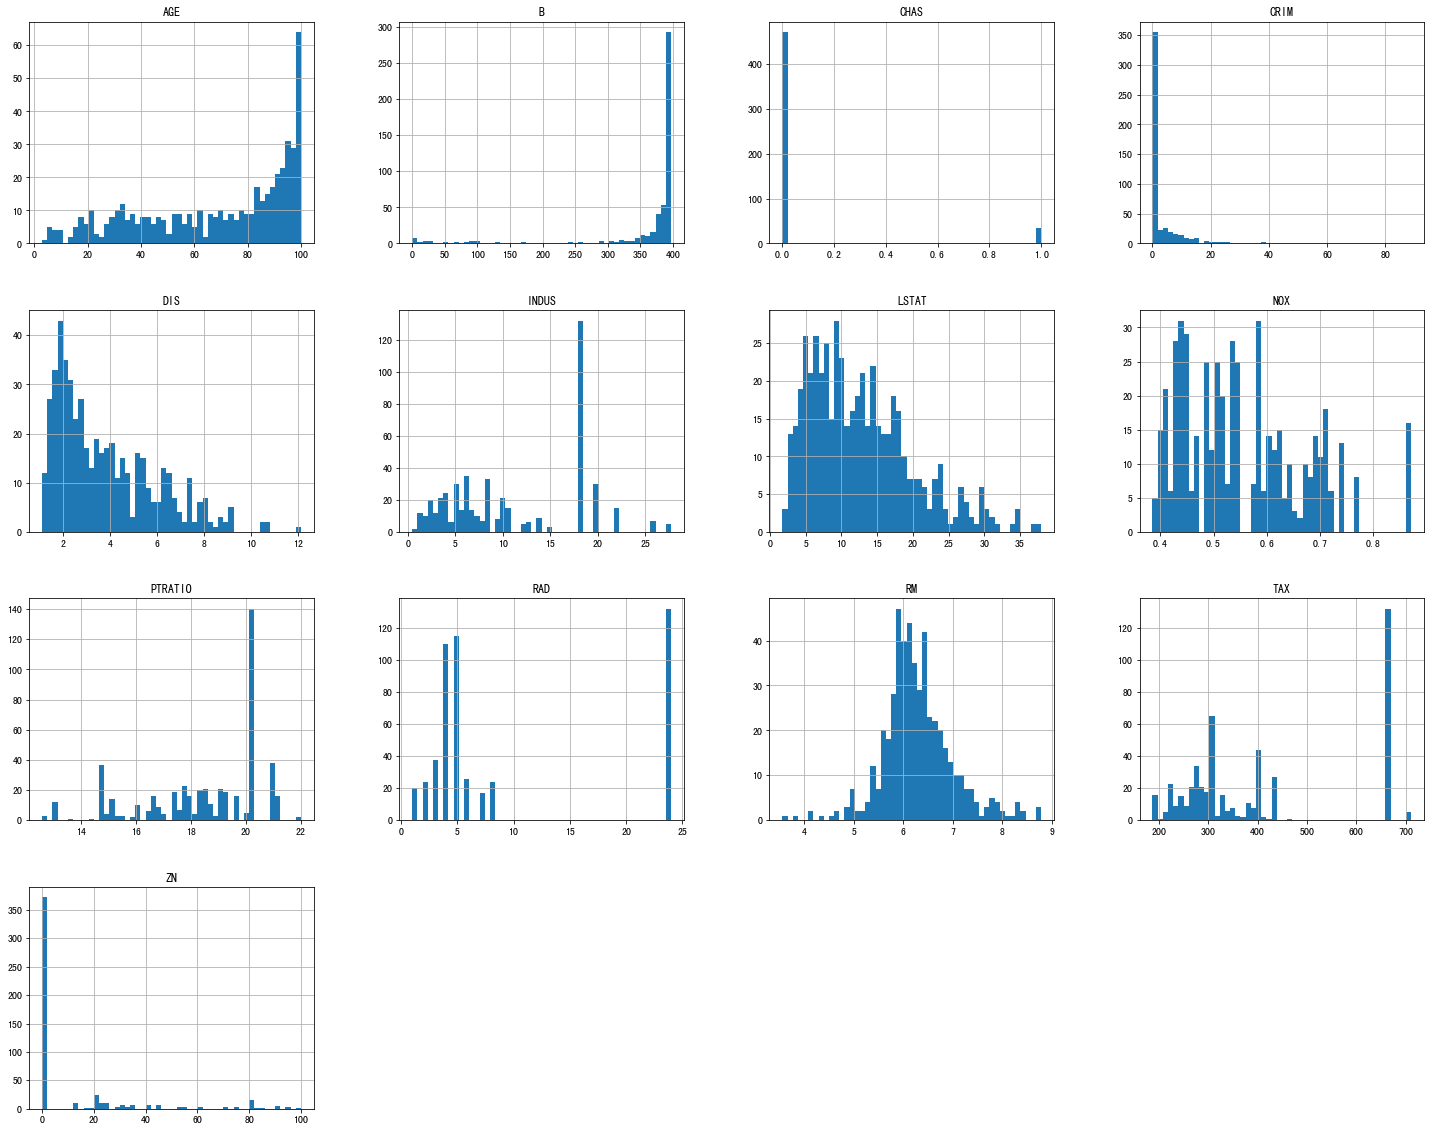

In [11]:
import matplotlib.pyplot as plt
train.hist(bins=50,figsize=(25,20))
plt.savefig('myspace/data/bosten.jpg')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


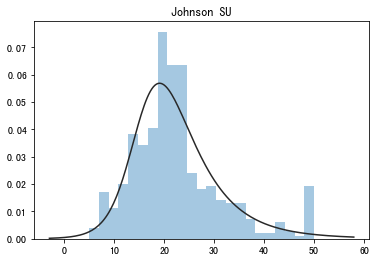

In [13]:
import seaborn as sns
import scipy.stats as st
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


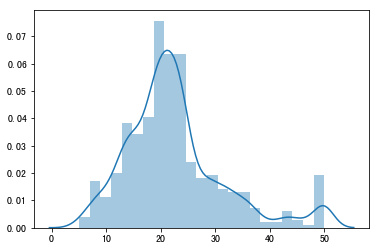

In [14]:
sns.distplot(y,kde=True)


In [22]:
from keras.models import *
from keras.layers import *
import keras.backend as K
from keras import optimizers
from keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler


In [3]:
from keras import initializers

In [43]:
#定义模型
def NN_model(input_dim):
    model=Sequential()
    model.add(Dense(units=40,input_shape=(input_dim,),kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(Activation('relu'))
    model.add(Dense(units=12,kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(Activation('relu'))
    #model.add(Dense(units=4,kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    #model.add(Activation('relu'))
    model.add(Dense(units=1))
    return model

In [16]:
from sklearn.model_selection import KFold

n_split=5
kf=KFold(n_splits=n_split,shuffle=True)
max_epochs=5
b_size=10
sgd=optimizers.SGD(lr=0.001)
model=NN_model(train.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [47]:
import math
from keras.callbacks import ModelCheckpoint
def dec_lrate(epoch):
    initlr=0.01
    step_epoch=4
    drop=0.6
    lr=initlr*drop**(math.floor((1+epoch)/step_epoch))
    if epoch%4==0 and epoch!=0:
        print('learn rate change to: {}'.format(lr))
    return lr
learn_rate=LearningRateScheduler(dec_lrate)
n_split=3
kf=KFold(n_splits=n_split,shuffle=True)
max_epochs=100
b_size=10
x=train.values
# checkpoint
filepath="myspace/model/weights.best.hdf5"
checkpoint= ModelCheckpoint(filepath, monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list= [learn_rate,checkpoint]
for fold,(tra_idx,val_idx) in enumerate(kf.split(x,y)):
    print('fold:{}'.format(fold))
    train_x,train_y=x[tra_idx],y[tra_idx]
    val_x,val_y=x[val_idx],y[val_idx]
    model=NN_model(train.shape[1])
    opt=optimizers.Adam(lr=0.01)
    model.compile(loss='mse',optimizer=opt,metrics=['mae'])
    hist=model.fit(train_x,train_y,batch_size=b_size,
              epochs=max_epochs, validation_data=[val_x,val_y],
              callbacks=callbacks_list,shuffle=True,verbose=2)


fold:0
Train on 337 samples, validate on 169 samples
Epoch 1/100
 - 1s - loss: 140.7207 - mean_absolute_error: 9.0250 - val_loss: 68.8058 - val_mean_absolute_error: 6.3151

Epoch 00001: val_mean_absolute_error improved from inf to 6.31508, saving model to myspace/model/weights.best.hdf5
Epoch 2/100
 - 0s - loss: 68.3920 - mean_absolute_error: 6.1627 - val_loss: 60.8261 - val_mean_absolute_error: 5.7199

Epoch 00002: val_mean_absolute_error improved from 6.31508 to 5.71995, saving model to myspace/model/weights.best.hdf5
Epoch 3/100
 - 0s - loss: 61.7323 - mean_absolute_error: 5.8198 - val_loss: 74.8547 - val_mean_absolute_error: 5.7771

Epoch 00003: val_mean_absolute_error did not improve from 5.71995
Epoch 4/100
 - 0s - loss: 59.2861 - mean_absolute_error: 5.5566 - val_loss: 76.4017 - val_mean_absolute_error: 7.3972

Epoch 00004: val_mean_absolute_error did not improve from 5.71995
Epoch 5/100
learn rate change to: 0.006
 - 0s - loss: 62.2946 - mean_absolute_error: 5.7534 - val_loss: 

In [49]:
# load weights
reg=NN_model(13)
reg.load_weights("myspace/model/weights.best.hdf5")
# Compile model (required to make predictions)
reg.compile(loss='mse', optimizer=opt, metrics=['mae'])
print("Created model and loaded weights from file")
# load pima indians dataset

Created model and loaded weights from file


In [59]:
price_pre=reg.predict(x)
price_pre[:,0].shape

(506,)

In [58]:
y.shape

(506,)

In [60]:
scores= reg.evaluate(x, y, verbose=0)
print("%s: %.2f" % (reg.metrics_names[1], scores[1]))
price_pre=reg.predict(x)
price=pd.DataFrame({'price':y,'NN_pre':price_pre[:,0]})
price.to_csv('myspace/result/bosten_price.csv',index=False)

mean_absolute_error: 3.74


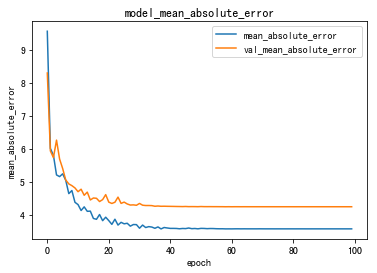

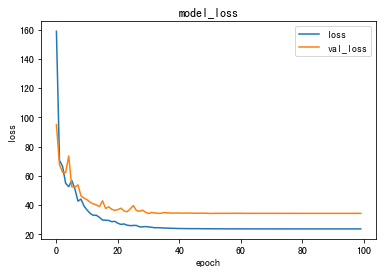

In [48]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.plot(hist.history['mean_absolute_error'],label='mean_absolute_error')
plt.plot(hist.history['val_mean_absolute_error'],label='val_mean_absolute_error')
plt.title('model_mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend()
plt.show()
fig=plt.figure()
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
model.compile(loss='mse',optimizer=sgd,metrics=['mae'])
hist=model.fit(train,y,batch_size=b_size,epochs=max_epochs,validation_split=0.2,shuffle=True)

Train on 404 samples, validate on 102 samples
Epoch 1/5
404/404 [==============================] - 0s 471us/step - loss: 10785.7703 - mean_absolute_error: 39.4169 - val_loss: 262.7278 - val_mean_absolute_error: 15.3571
Epoch 2/5
404/404 [==============================] - 0s 117us/step - loss: 596.7864 - mean_absolute_error: 22.6097 - val_loss: 209.1454 - val_mean_absolute_error: 13.5003
Epoch 3/5
404/404 [==============================] - 0s 121us/step - loss: 519.2225 - mean_absolute_error: 20.8274 - val_loss: 165.8069 - val_mean_absolute_error: 11.7864
Epoch 4/5
404/404 [==============================] - 0s 114us/step - loss: 453.2538 - mean_absolute_error: 19.1913 - val_loss: 131.1587 - val_mean_absolute_error: 10.2272
Epoch 5/5
404/404 [==============================] - 0s 108us/step - loss: 397.5002 - mean_absolute_error: 17.6627 - val_loss: 103.7431 - val_mean_absolute_error: 8.8223


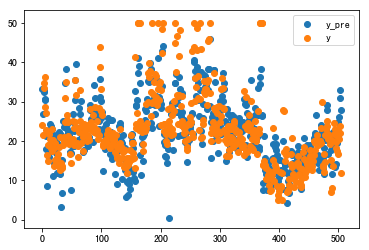

In [67]:
fig=plt.figure()
plt.scatter(range(506),price_pre,label='y_pre')
plt.scatter(range(506),y,label='y')
plt.legend()
plt.show()